In [25]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import blueice as bi
from Axion import ALP, SolarAxion

In [2]:
def signal_model(m, g):
    A = ALP(m, g)
    #binning = [4.9, 5.1, 3]
    binning = [0, 2*m, 1001]
    es = np.linspace(*binning)
    bin_width = es[1] - es[0]

    index = np.where(np.absolute(es-m) == min(np.absolute(es-m)))
    
    # our energy should be indexed by es[50]
    assert abs(es[index] - m) < 1e-6

    # delta function centered around our mass value
    rates = np.zeros(len(es))
    rates[index] += A.rate() / bin_width
    return binning, rates

def write_json(m, g):
    binning, rates = signal_model(m,g)
    rates = rates.tolist()
    to_encode = {'coordinate_system': [["E", binning]],
                 'map': rates}
    with open('signal_models/ALP_%dkeV.json' % m, 'w') as f:
        json.dump(to_encode, f)

Rate: 252.82


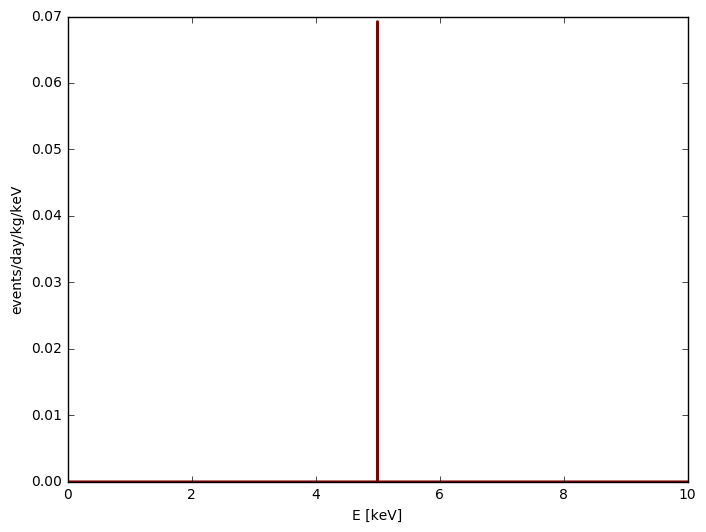

In [3]:
m = 5
g = 1e-13

alprate = ALP(m, g).rate() * 1000 * 365 # convert from events/kg/day to events/ton/yr
print('Rate: %0.2f' % alprate)
write_json(m, g=g)
bins, rate = signal_model(m, g)

plt.figure()
plt.plot(np.linspace(*bins), rate, color='maroon', drawstyle='steps-mid')
plt.xlabel('E [keV]')
plt.ylabel('events/day/kg/keV')
plt.show()

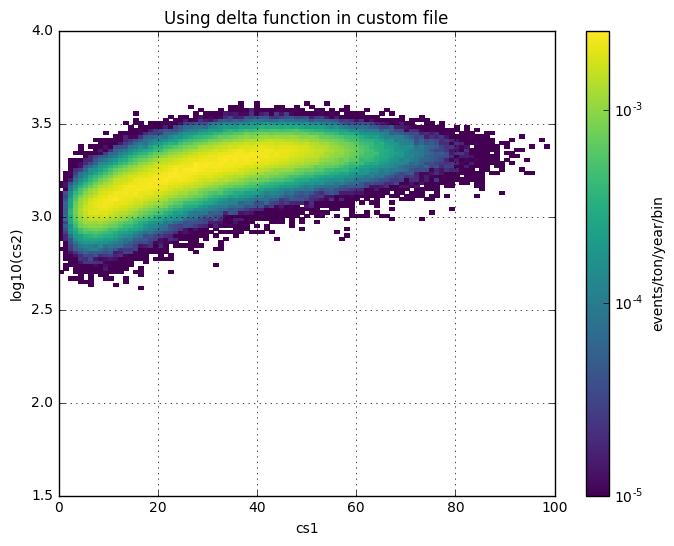

In [6]:
with open('/home/ershockley/axion_test.json') as f:
    data = json.load(f)
    
xbins, x0, x1 = data['binning'][0][1]
ybins, y0, y1 = data['binning'][1][1]

hist = np.array(data['hist'])

x = np.linspace(x0, x1, xbins)
y = np.linspace(y0, y1, ybins)


colorscale = LogNorm(vmin=1e-5, vmax=hist.max())


hist = np.array(data['hist']).T
plt.pcolormesh(x, y, hist, norm=colorscale)
cbar = plt.colorbar()
cbar.set_label('events/ton/year/bin')
plt.grid()
plt.xlabel('cs1')
plt.ylabel('log10(cs2)')
plt.title('Using delta function in custom file')
plt.savefig('bbf_delta.pdf')
plt.show()

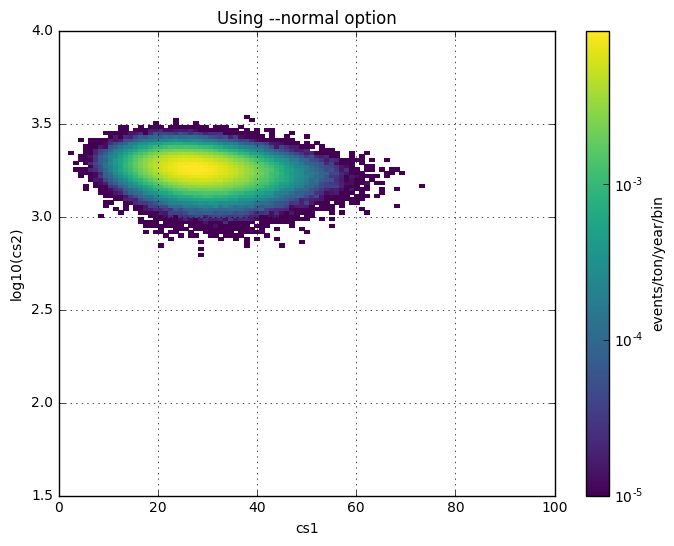

In [20]:
with open('/home/ershockley/axion_normaltest.json') as f:
    data = json.load(f)
    
xbins, x0, x1 = data['binning'][0][1]
ybins, y0, y1 = data['binning'][1][1]

hist = np.array(data['hist'])

x = np.linspace(x0, x1, xbins)
y = np.linspace(y0, y1, ybins)


colorscale = LogNorm(vmin=1e-5, vmax=hist.max())


hist = np.array(data['hist']).T
plt.pcolormesh(x, y, hist, norm=colorscale)
cbar = plt.colorbar()
cbar.set_label('events/ton/year/bin')
plt.grid()
plt.xlabel('cs1')
plt.ylabel('log10(cs2)')
plt.title('Using --normal option')
plt.savefig('bbf_normal.pdf')
plt.show()

In [21]:
data

{'binning': [['cs1', [100, 0.0, 100.0]], ['log10_cs2', [125, 1.7, 3.9]]],
 'hist': [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0

## Solar Axion

In [8]:
def signal_model(m, g):
    A = SolarAxion(m, g)
    #binning = [4.9, 5.1, 3]
    binning = [0.1, 10, 100]
    es = np.linspace(*binning)
    rates = A.dRdE(es)
    return binning, rates

def write_json(m, g):
    binning, rates = signal_model(m,g)
    rates = rates.tolist()
    to_encode = {'coordinate_system': [["E", binning]],
                 'map': rates}
    with open('signal_models/SolarAxion.json', 'w') as f:
        json.dump(to_encode, f)

0.1
Total rate: 1.54e+03 events/ton/year


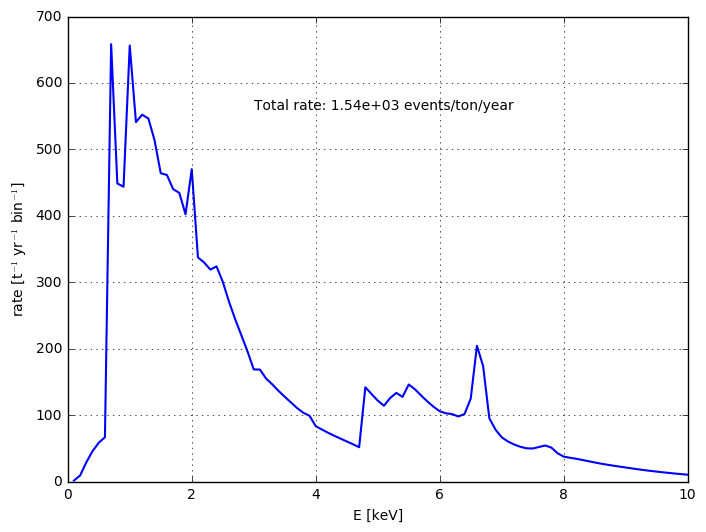

In [18]:
from scipy.integrate import simps

m = 1e-3 # keV
g = 1e-11

A = SolarAxion(m,g)
es = np.linspace(0.1, 10, 100)
rates = A.dRdE(es) # events/day/kg/keV

bin_width = es[1] - es[0]
print(bin_width)
# convert y axis to events/ton/year/bin
rates = rates * 1000 * 365 * bin_width
integral = simps(rates, es)

print("Total rate: %0.2e events/ton/year" % integral)

write_json(m,g)

f, ax = plt.subplots()
plt.plot(es, rates)
plt.xlabel('E [keV]')
plt.ylabel('rate [t$^{-1}$ yr$^{-1}$ bin$^{-1}$]')
plt.grid()
plt.text(0.3, 0.8, "Total rate: %0.3g events/ton/year" % integral, transform=ax.transAxes)
plt.show()

Total events in bbf data: 917.9


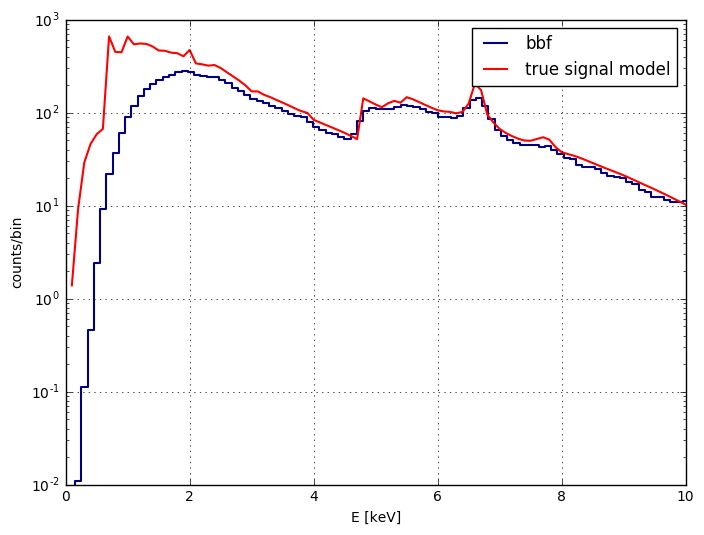

In [19]:
with open('/home/ershockley/solaraxion_Espectrum.json') as f:
    data = json.load(f)
    
xbins, x0, x1 = data['binning'][0][1]

hist = np.array(data['hist'])

x = np.linspace(x0, x1, xbins)

data_integral = simps(hist, x)
print("Total events in bbf data: %0.4g" % data_integral)

plt.figure()
plt.plot(x, hist, drawstyle='steps-mid', color='navy', label='bbf')
plt.plot(es, rates, color='red', label='true signal model')
plt.xlabel('E [keV]')
plt.ylabel('counts/bin')
plt.grid()
plt.yscale('log')
plt.legend()
plt.savefig('plots/compare_solar.png')
plt.show()

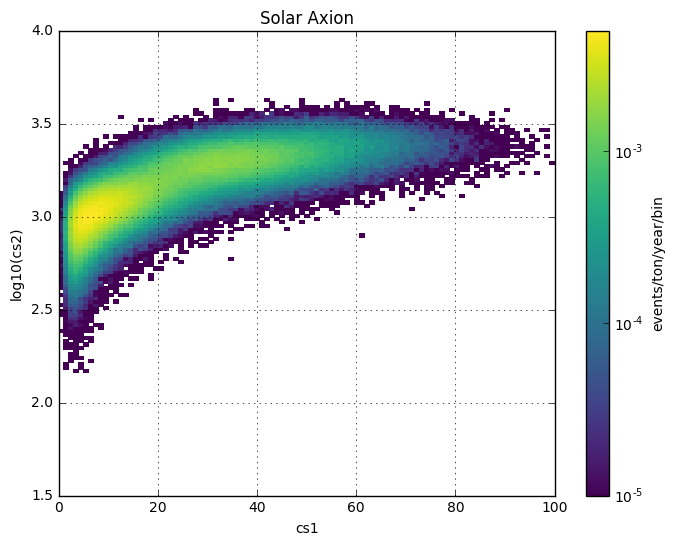

In [11]:
with open('/home/ershockley/solaraxion_test.json') as f:
    data = json.load(f)
    
xbins, x0, x1 = data['binning'][0][1]
ybins, y0, y1 = data['binning'][1][1]

hist = np.array(data['hist'])

x = np.linspace(x0, x1, xbins)
y = np.linspace(y0, y1, ybins)

colorscale = LogNorm(vmin=1e-5, vmax=hist.max())

hist = np.array(data['hist']).T
plt.pcolormesh(x, y, hist, norm=colorscale)
cbar = plt.colorbar()
cbar.set_label('events/ton/year/bin')
plt.grid()
plt.xlabel('cs1')
plt.ylabel('log10(cs2)')
plt.title('Solar Axion')
plt.show()

In [78]:
import multihist as mh

def json_to_multihist(jsonname, histname):
    """Converts a json output from bbf to a multihist object"""
    if not os.path.exists(jsonname):
        raise FileNotFoundError

    with open(jsonname) as f:
        data = json.load(f)

    axis_names = [data['binning'][0][0], data['binning'][1][0]]

    xbins, x0, x1 = data['binning'][0][1]
    ybins, y0, y1 = data['binning'][1][1]
    
    x_edges = np.linspace(x0, x1, xbins+1)
    y_edges = np.linspace(y0, y1, ybins+1)
    
    hist = np.array(data['hist'])
    
    out_hist = mh.Histdd.from_histogram(hist, axis_names=axis_names, bin_edges=[x_edges, y_edges])
    return out_hist

In [79]:
hist = json_to_multihist('/home/ershockley/solaraxion_test.json', 'test')

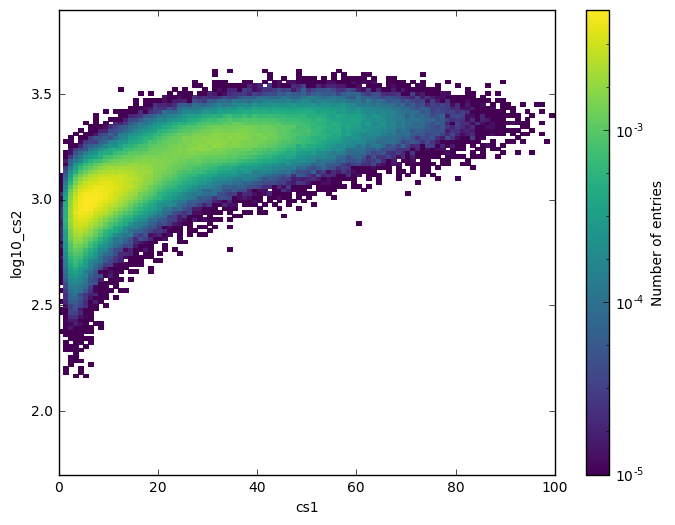

In [87]:
hist.plot(log_scale=True, log_scale_vmin=0.00001)
plt.show()

In [48]:
np.linspace(0,5, 5)

array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ])

In [51]:
arr = np.random.randn(1000)
hist, bins = np.histogram(arr, range=(-1,1), bins=10)

In [53]:
len(bins)

11

In [62]:
np.linspace(-1,1,11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [63]:
bins

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])